<h1>
Analysis of the Driving Factors in a Film
</h1>

In [1]:
#Import packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Import the datasets into dataframes
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
#A Quick Look at the dataframe: Credits
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
#A Quick Look at the dataframe: movies
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
#Filters to limit the data and remove outliers
movies = movies[movies.original_language == 'en']#keep only original english movies
movies = movies[movies.vote_count != 0] #keep movies having non null votes
movies = movies[movies.genres != '[]'] 

In [6]:
#Clean the Dataset
#Create new dataframes from Dictionary like columns
def mapper(df, col, new_col):
    temp = []
    for n, row in df.iterrows():
        [temp.append(tuple(i.values())+(row[new_col],)) for i in json.loads(row[col])]
    new_df = pd.DataFrame(temp)
    new_df.columns = list(json.loads(row[col])[0].keys()) + ['movie_id']

    return new_df

In [7]:
#Extracting the Data from json like columns
credit_cast = mapper(credits, 'cast', 'movie_id')
credit_crew = mapper(credits, 'crew', 'movie_id')
movie_genres = mapper(movies, 'genres', 'id')
movie_keywords = mapper(movies, 'keywords', 'id')
movie_production_companies = mapper(movies, 'production_companies', 'id')
movie_spoken_languages = mapper(movies, 'spoken_languages', 'id')
movie_production_countries = mapper(movies, 'production_countries', 'id')

In [8]:
movie_genres.columns

Index(['id', 'name', 'movie_id'], dtype='object')

In [9]:
#Renaming the columns for convinience
credit_cast.columns = ['cast_id', 'character', 'credit_id', 'gender', 'actor_id', 'actor_name', 'order','movie_id']
credit_crew.columns = ['credit_id', 'department', 'gender', 'job_id', 'job', 'crew_member', 'movie_id']
movie_genres.columns = ['genre_id','genre','movie_id']
movie_production_companies.columns = ['studio', 'studio_id', 'movie_id']
movie_spoken_languages.columns = ['iso_639_1', 'language', 'movie_id']
movie_production_countries.columns = ['iso_3166_1', 'country', 'movie_id']

In [10]:
movie_genres.columns

Index(['genre_id', 'genre', 'movie_id'], dtype='object')

In [11]:
#Method to plot histograms 
#hedhi a changer,fi blasset histo na3mlou table wela plot figure
def plot_hist(df, col, x, y):
    ax = df.groupby(col)['movie_id'].nunique().sort_values().plot(figsize=(20,10), kind='bar', fontsize=13)
    ax.set_xlabel(x, fontsize=13)
    ax.set_ylabel(y, fontsize=13)
    plt.show()

#Understanding the Genres
plot_hist(movie_genres, 'genre', 'Genres', 'Number of Movies Made')
movie_genres.head()

In [ ]:
#fi blasset el hist ,nwali nchoufou el table ou el data

In [13]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [14]:
metrics = movies[['id','popularity','revenue','runtime','vote_count','vote_average','budget']]


In [15]:
metrics.head()

,id,popularity,revenue,runtime,vote_count,vote_average,budget
0,19995,150.437577,2787965087,162.0,11800,7.2,237000000
1,285,139.082615,961000000,169.0,4500,6.9,300000000
2,206647,107.376788,880674609,148.0,4466,6.3,245000000
3,49026,112.312950,1084939099,165.0,9106,7.6,250000000
4,49529,43.926995,284139100,132.0,2124,6.1,260000000


In [16]:
metrics.columns = ['movie_id','popularity','revenue','runtime','vote_count','vote_average','budget']

In [17]:
metrics.head()

,movie_id,popularity,revenue,runtime,vote_count,vote_average,budget
0,19995,150.437577,2787965087,162.0,11800,7.2,237000000
1,285,139.082615,961000000,169.0,4500,6.9,300000000
2,206647,107.376788,880674609,148.0,4466,6.3,245000000
3,49026,112.312950,1084939099,165.0,9106,7.6,250000000
4,49529,43.926995,284139100,132.0,2124,6.1,260000000


In [18]:
movie_genres.head()

,genre_id,genre,movie_id
0,28,Action,19995
1,12,Adventure,19995
2,14,Fantasy,19995
3,878,Science Fiction,19995
4,12,Adventure,285


genre_df = pd.merge(movie_genres, metrics, on='movie_id',how='inner') #jointure inner

weights = genre_df.groupby('genre').agg({'movie_id':'count', 'revenue':'mean','runtime':'mean', 
                           'vote_count':'sum','vote_average':'mean','budget':'mean'})

#weights['vote_count'].sort_values(ascending=False).plot(figsize=(20,10), kind='bar', fontsize=13)
import seaborn as sns

weights = weights.reset_index().sort_values('vote_average',ascending=False)
plt.figure(figsize=(20,10))
sns.violinplot(x=genre_df['genre'], y=genre_df['vote_average'], linewidth=0.5,fontsize=13)
plt.ylabel('Rating',fontsize=13)
plt.xlabel('Genres',fontsize=13)
plt.title('Avg. Genre Rating',fontsize=15)
plt.show()

In [19]:
metrics = movies[['id','popularity','revenue','runtime','vote_count','vote_average']]
metrics.columns = ['movie_id','popularity','revenue','runtime','vote_count','vote_average']

weights = pd.merge(movie_genres, metrics, on='movie_id',how='inner')
weights = weights.groupby('genre').agg({'movie_id':'count', 'revenue':'mean','runtime':'mean', 
                           'vote_count':'count','vote_average':'mean'})
weights.head()

,movie_id,revenue,runtime,vote_count,vote_average
genre,,,,,
Action,1082,1.486378e+08,110.244917,1082,5.989372
Adventure,752,2.162257e+08,111.156915,752,6.146011
Animation,208,2.490460e+08,89.024038,208,6.324519
Comedy,1634,7.439521e+07,99.916769,1634,5.974969
Crime,652,7.013035e+07,109.703988,652,6.289724


In [20]:
#Creating a Weights dataframe to attach genre-wise weights to the movies, These weights are decided by various aspectes
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()

metrics = movies[['id','popularity','revenue','runtime','vote_count','vote_average']]
metrics.columns = ['movie_id','popularity','revenue','runtime','vote_count','vote_average']

weights = pd.merge(movie_genres, metrics, on='movie_id',how='inner')
weights = weights.groupby('genre').agg({'movie_id':'count', 'revenue':'mean','runtime':'mean', 
                           'vote_count':'count','vote_average':'mean'})


weights_scores = np.sum(ss.fit_transform(weights),axis=1)
weights_scores

array([2.41279643, 2.52939388, 1.87708062, 2.43572985, 1.9525513 ,
       1.2330679 , 3.46490843, 1.74275873, 1.9944113 , 0.98973767,
       2.40547642, 0.86269429, 1.54107024, 1.61103362, 2.01233923,
       1.84310453, 0.        , 2.27289893, 2.33389408, 1.55827941])

In [21]:
weights.index

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genre')

In [22]:
weights_scores

array([2.41279643, 2.52939388, 1.87708062, 2.43572985, 1.9525513 ,
       1.2330679 , 3.46490843, 1.74275873, 1.9944113 , 0.98973767,
       2.40547642, 0.86269429, 1.54107024, 1.61103362, 2.01233923,
       1.84310453, 0.        , 2.27289893, 2.33389408, 1.55827941])

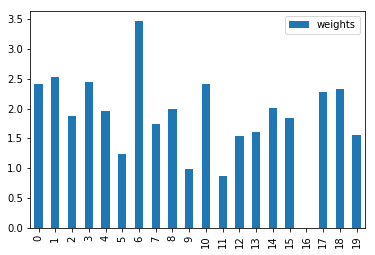

In [23]:
scores_df = pd.DataFrame({'Genres':list(weights.index),'weights':weights_scores})
weights = weights_scores
scores_df.plot(kind='bar')

In [24]:
scores_df


,Genres,weights
0,Action,2.412796
1,Adventure,2.529394
2,Animation,1.877081
3,Comedy,2.435730
4,Crime,1.952551
5,Documentary,1.233068
6,Drama,3.464908
7,Family,1.742759
8,Fantasy,1.994411
9,Foreign,0.989738


In [25]:
def score_calculator(df1, df2, col):
    joined_df = pd.merge(df1, df2, on ='movie_id')
    #pivot tables and make the col (actor_name) as an index
    temp = joined_df.pivot_table(index = col, columns = 'genre', values = 'genre_id', aggfunc = 'count').fillna(0)
    
    df_index = temp.index
    score_df = pd.DataFrame(np.matmul(temp.values, weights))
    score_df.index = df_index
    score_df.columns = ['score']
    score_df = score_df.sort_values(by='score',ascending=False).reset_index()
    
    score = pd.merge(df1, score_df, on = col, how = 'inner').groupby('movie_id')['score'].sum().reset_index()
    score.columns = ['movie_id',col+'_score']
    
    return score

In [26]:
credit_cast.head()

,cast_id,character,credit_id,gender,actor_id,actor_name,order,movie_id
0,242,Jake Sully,5602a8a7c3a3685532001c9a,2,65731,Sam Worthington,0,19995
1,3,Neytiri,52fe48009251416c750ac9cb,1,8691,Zoe Saldana,1,19995
2,25,Dr. Grace Augustine,52fe48009251416c750aca39,1,10205,Sigourney Weaver,2,19995
3,4,Col. Quaritch,52fe48009251416c750ac9cf,2,32747,Stephen Lang,3,19995
4,5,Trudy Chacon,52fe48009251416c750ac9d3,1,17647,Michelle Rodriguez,4,19995


In [27]:
movie_genres.head()

,genre_id,genre,movie_id
0,28,Action,19995
1,12,Adventure,19995
2,14,Fantasy,19995
3,878,Science Fiction,19995
4,12,Adventure,285


In [28]:
cast_score = score_calculator(credit_cast, movie_genres, 'actor_name')
production_score = score_calculator(movie_production_companies, movie_genres, 'studio')
crew_score = score_calculator(credit_crew, movie_genres, 'crew_member')

In [29]:
cast_score.head()

,movie_id,actor_name_score
0,5,1559.632692
1,11,1872.556765
2,12,1650.824548
3,13,1560.893005
4,14,1332.531829


In [30]:
production_score.head()

,movie_id,studio_score
0,5,612.523142
1,11,1583.527235
2,12,114.695539
3,13,1779.547531
4,14,528.945508


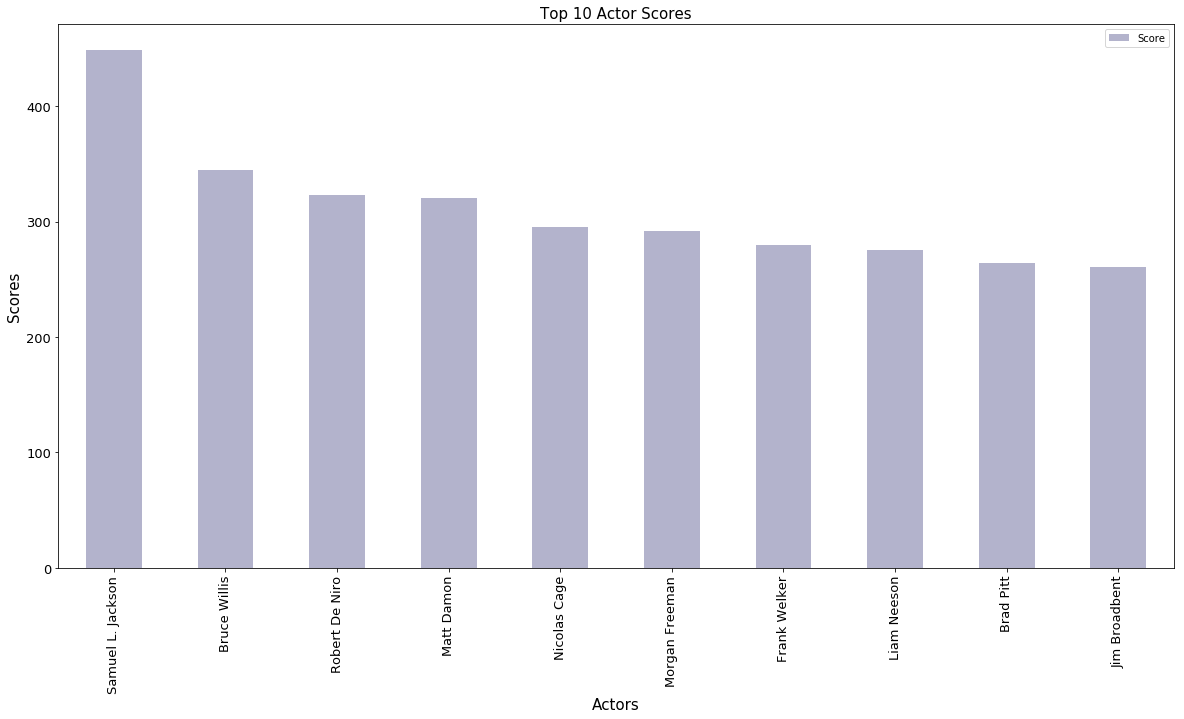

In [31]:
#Actor
joined_df = pd.merge(credit_cast, movie_genres, on ='movie_id')
temp = joined_df.pivot_table(index = 'actor_name', columns = 'genre', values = 'genre_id', aggfunc = 'count').fillna(0)
df_index = temp.index
score_df = pd.DataFrame(np.matmul(temp.values, weights))
score_df.index = df_index
score_df.columns = ['Score']
score_df.sort_values(ascending=False, by='Score').head(10).plot(figsize=(20,10), kind='bar', fontsize=13,color=(0.7,0.7,0.8))
plt.xlabel('Actors',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Top 10 Actor Scores',fontsize=15)
plt.show()

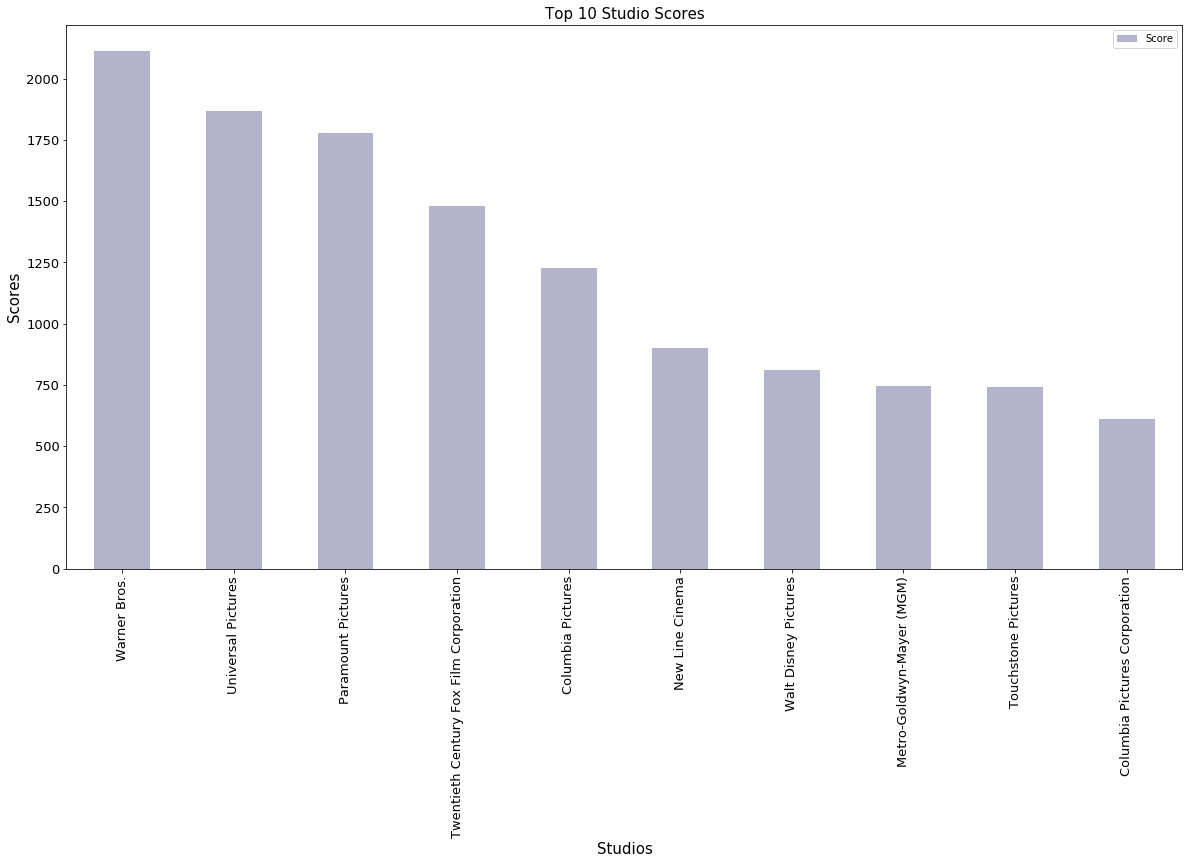

In [32]:
#Studio
joined_df = pd.merge(movie_production_companies, movie_genres, on ='movie_id')
temp = joined_df.pivot_table(index = 'studio', columns = 'genre', values = 'genre_id', aggfunc = 'count').fillna(0)
df_index = temp.index
score_df = pd.DataFrame(np.matmul(temp.values, weights))
score_df.index = df_index
score_df.columns = ['Score']
score_df.sort_values(ascending=False, by='Score').head(10).plot(figsize=(20,10), kind='bar', fontsize=13,color=(0.7,0.7,0.8))
plt.xlabel('Studios',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Top 10 Studio Scores',fontsize=15)
plt.show()

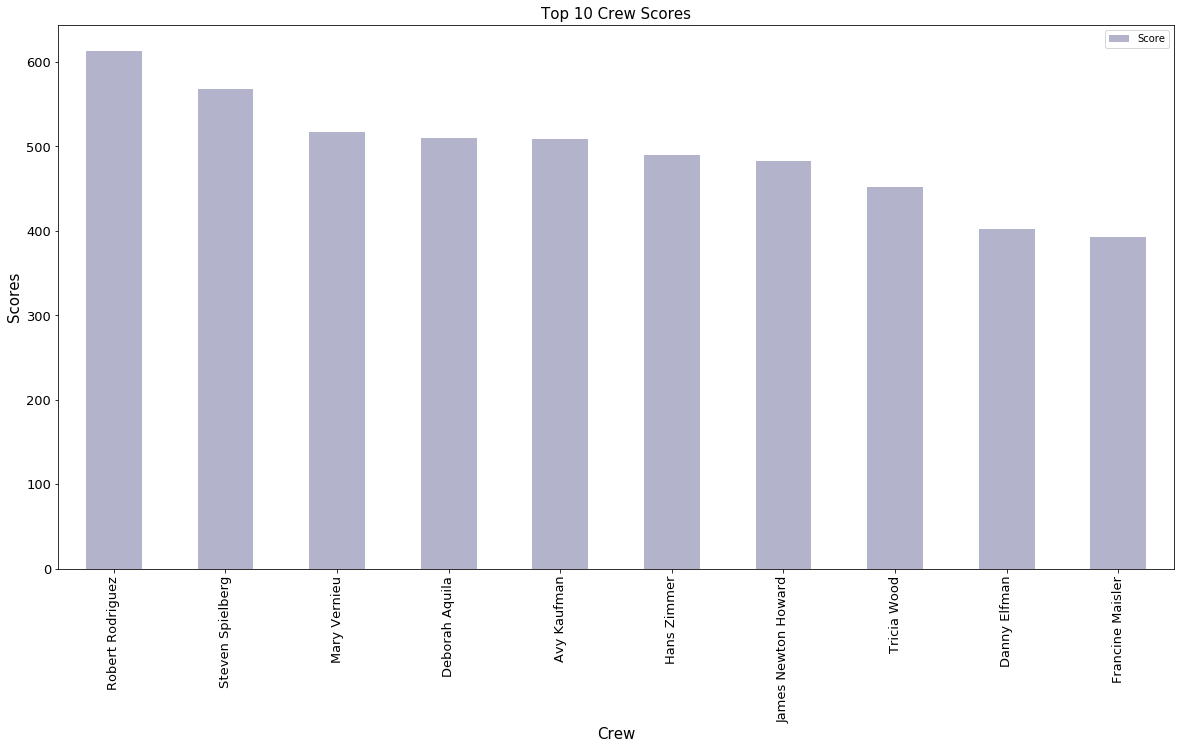

In [33]:
#Crew
joined_df = pd.merge(credit_crew, movie_genres, on ='movie_id')
temp = joined_df.pivot_table(index = 'crew_member', columns = 'genre', values = 'genre_id', aggfunc = 'count').fillna(0)
df_index = temp.index
score_df = pd.DataFrame(np.matmul(temp.values, weights))
score_df.index = df_index
score_df.columns = ['Score']
score_df.sort_values(ascending=False, by='Score').head(10).plot(figsize=(20,10), kind='bar', fontsize=13,color=(0.7,0.7,0.8))
plt.xlabel('Crew',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Top 10 Crew Scores',fontsize=15)
plt.show()

In [34]:
movies['release_month'] = movies.release_date.str.split('-').apply(lambda x:int(x[1]))
def season(row):
    if row >= 1 and row < 4:
        return 'winter'
    elif row >= 4 and row < 7:
        return 'spring'
    elif row >= 7 and row < 10:
        return 'summer'
    elif row >= 10 and row < 12:
        return 'autumn'
    else:
        return 'winter'

movies['season'] = movies.release_month.apply(season)
movies.columns
data = movies.drop(['genres', 'homepage', 'keywords', 'original_title', 'overview', 'production_companies', 
                    'release_date', 'production_countries', 'spoken_languages', 'status', 'tagline',
                    'release_month'],axis=1)
data.columns = ['budget', 'movie_id', 'original_language', 'popularity', 'revenue', 'runtime', 'title', 'vote_average',
                'vote_count', 'season']
data = pd.merge(data, cast_score, on='movie_id', how='inner')
data = pd.merge(data, production_score, on='movie_id', how='inner')
data = pd.merge(data, crew_score, on='movie_id', how='inner')
data.head()

,budget,movie_id,original_language,popularity,revenue,runtime,title,vote_average,vote_count,season,actor_name_score,studio_score,crew_member_score
0,237000000,19995,en,150.437577,2787965087,162.0,Avatar,7.2,11800,winter,1945.151310,2085.461895,8002.674579
1,300000000,285,en,139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,spring,2259.407779,978.368741,3812.458906
2,245000000,206647,en,107.376788,880674609,148.0,Spectre,6.3,4466,autumn,1627.351348,1292.491276,7481.485907
3,250000000,49026,en,112.312950,1084939099,165.0,The Dark Knight Rises,7.6,9106,summer,5449.287500,2515.829691,11039.547108
4,260000000,49529,en,43.926995,284139100,132.0,John Carter,6.1,2124,winter,1485.746085,808.884465,6276.145102


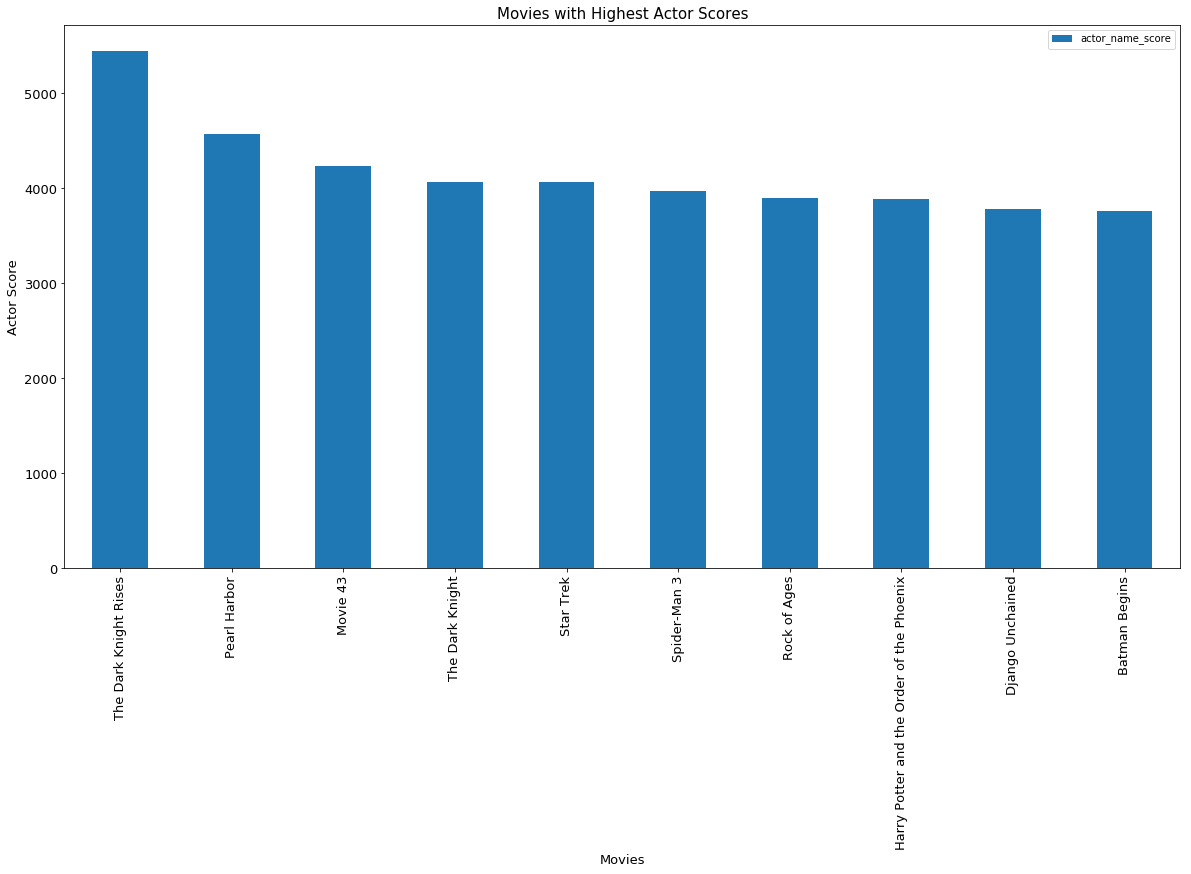

In [35]:
def plot_hist2(df, col, title, x, y):
    temp = data[['title', col]].sort_values(by=col, ascending=False).head(10)
    ax = temp.set_index('title').plot(kind='bar', figsize=(20,10), fontsize=13)
    ax.set_xlabel(x, fontsize=13)
    ax.set_ylabel(y, fontsize=13)
    ax.set_title(title, fontsize=15)
    plt.show()

plot_hist2(data, 'actor_name_score', 'Movies with Highest Actor Scores', 'Movies', 'Actor Score')

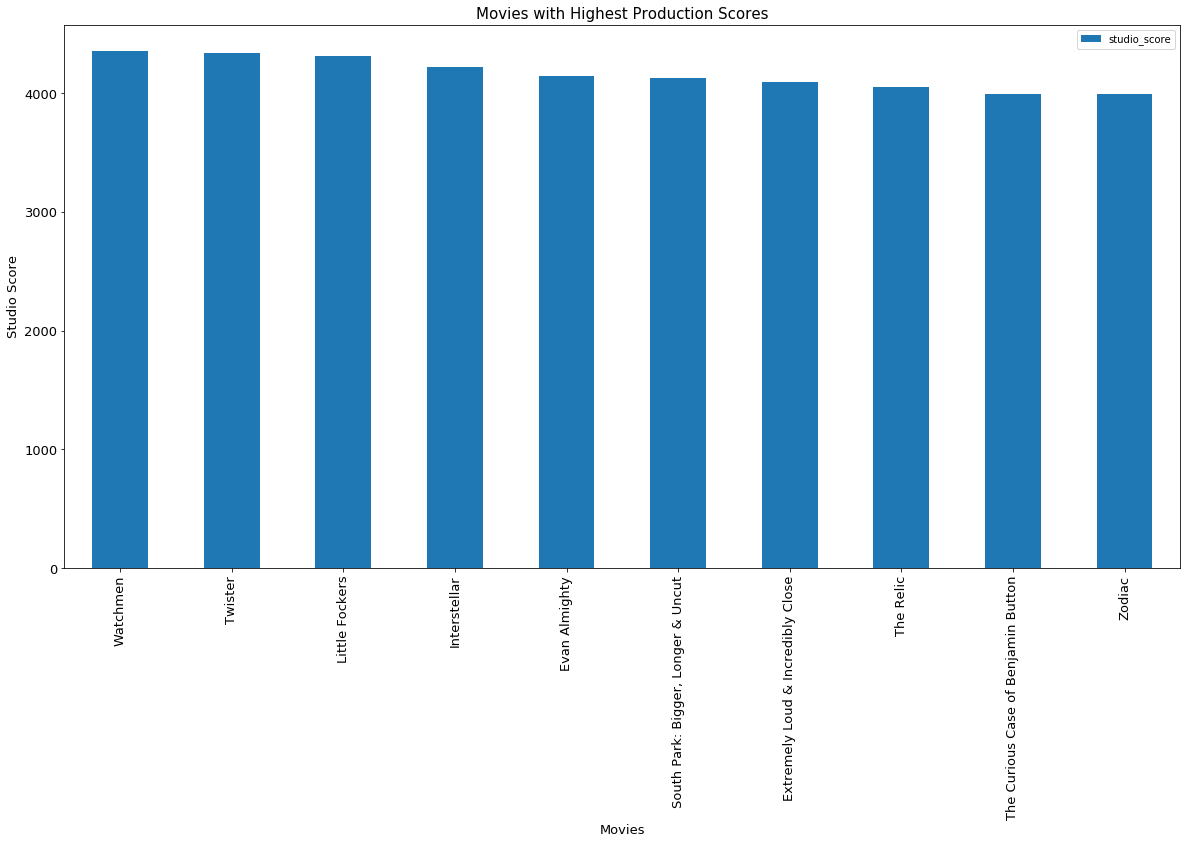

In [36]:
plot_hist2(data, 'studio_score', 'Movies with Highest Production Scores', 'Movies', 'Studio Score')

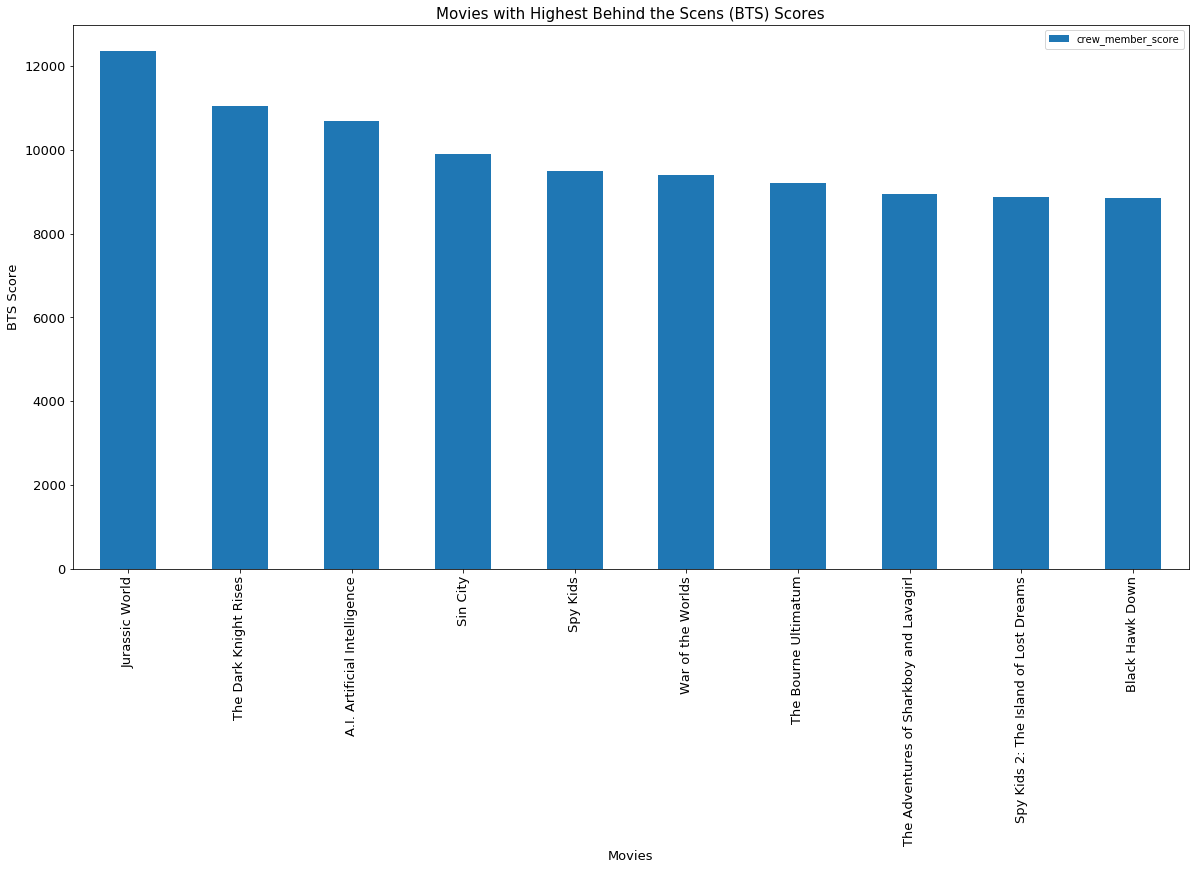

In [37]:
plot_hist2(data, 'crew_member_score', 'Movies with Highest Behind the Scenes (BTS) Scores', 'Movies', 'BTS Score')

In [38]:
#Creating the Target Variables
def create_labels(row):
    if (row['vote_average']>= 6.1)&(row['popularity']>30)&((row['revenue']-row['budget'])>0):
        return 1
    else:
        return 0

data['target'] = data[['vote_average','popularity','revenue', 'budget']].apply(create_labels,axis=1)
data.head()

,budget,movie_id,original_language,popularity,revenue,runtime,title,vote_average,vote_count,season,actor_name_score,studio_score,crew_member_score,target
0,237000000,19995,en,150.437577,2787965087,162.0,Avatar,7.2,11800,winter,1945.151310,2085.461895,8002.674579,1
1,300000000,285,en,139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,spring,2259.407779,978.368741,3812.458906,1
2,245000000,206647,en,107.376788,880674609,148.0,Spectre,6.3,4466,autumn,1627.351348,1292.491276,7481.485907,1
3,250000000,49026,en,112.312950,1084939099,165.0,The Dark Knight Rises,7.6,9106,summer,5449.287500,2515.829691,11039.547108,1
4,260000000,49529,en,43.926995,284139100,132.0,John Carter,6.1,2124,winter,1485.746085,808.884465,6276.145102,1


In [55]:
(data.drop(['target','movie_id','title','original_language', 
                              'budget', 'revenue', 'vote_average', 'vote_count', 'popularity'],axis=1)).head()

,runtime,season,actor_name_score,studio_score,crew_member_score
0,162.0,winter,1945.151310,2085.461895,8002.674579
1,169.0,spring,2259.407779,978.368741,3812.458906
2,148.0,autumn,1627.351348,1292.491276,7481.485907
3,165.0,summer,5449.287500,2515.829691,11039.547108
4,132.0,winter,1485.746085,808.884465,6276.145102


In [53]:
pd.get_dummies(data.drop(['target','movie_id','title','original_language', 
                              'budget', 'revenue', 'vote_average', 'vote_count', 'popularity'],axis=1)).head()

,runtime,actor_name_score,studio_score,crew_member_score,season_autumn,season_spring,season_summer,season_winter
0,162.0,1945.151310,2085.461895,8002.674579,0,0,0,1
1,169.0,2259.407779,978.368741,3812.458906,0,1,0,0
2,148.0,1627.351348,1292.491276,7481.485907,1,0,0,0
3,165.0,5449.287500,2515.829691,11039.547108,0,0,1,0
4,132.0,1485.746085,808.884465,6276.145102,0,0,0,1


In [39]:
#Getting the feature and target vector
X = pd.get_dummies(data.drop(['target','movie_id','title','original_language', 
                              'budget', 'revenue', 'vote_average', 'vote_count', 'popularity'],axis=1)).values
y = data['target'].values
cols = list(pd.get_dummies(data.drop(['target','movie_id','title','original_language', 
                              'budget', 'revenue', 'vote_average', 'vote_count', 'popularity'],axis=1)).columns)

In [58]:
X

array([[1.62000000e+02, 1.94515131e+03, 2.08546190e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.69000000e+02, 2.25940778e+03, 9.78368741e+02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.48000000e+02, 1.62735135e+03, 1.29249128e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.70000000e+01, 1.60910964e+02, 2.39930769e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20000000e+02, 1.89664148e+02, 2.56757011e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.00000000e+01, 8.49511117e+02, 2.46613579e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [60]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
#Divide the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clfs = {'dt': DecisionTreeClassifier(random_state=0),#hedhi eli besh neksmouha twali bel ka3ba bel ka3ba
        'rf': RandomForestClassifier(random_state=0)}

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

In [43]:
param_grids = {}

In [44]:
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['dt'] = param_grid

In [45]:
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['rf'] = param_grid

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name], param_grid=param_grids[name], scoring='accuracy', n_jobs=-1, 
                      cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=10))
    
    # Fit the pipeline
    gs.fit(X_train, y_train)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

In [47]:
# Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.8288659793814434, {'clf__min_samples_leaf': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 10}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]

[0.8213058419243986, {'clf__min_samples_leaf': 30, 'clf__min_samples_split': 2}, <class 'sklearn.tree.tree.DecisionTreeClassifier'>]



In [65]:
print(best_score_param_estimators[0][2])

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=Non...imators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])


In [67]:
#RandomForestClassifier
from sklearn.metrics import confusion_matrix
y_pred = best_score_param_estimators[0][2].predict(X_test)
confusion_matrix(y_test, y_pred)

array([[961,  47],
       [167,  73]], dtype=int64)

In [68]:
#Tree
from sklearn.metrics import confusion_matrix
y_pred = best_score_param_estimators[1][2].predict(X_test)
confusion_matrix(y_test, y_pred)

array([[962,  46],
       [180,  60]], dtype=int64)

In [69]:
#Lets us Recreate the Random Forest Classifier with the same parameters
rf = RandomForestClassifier(min_samples_leaf= 10, min_samples_split= 30, n_estimators= 30, random_state=0)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.17857385, 0.22893499, 0.13843289, 0.41304883, 0.00735238,
       0.01525001, 0.0075521 , 0.01085495])

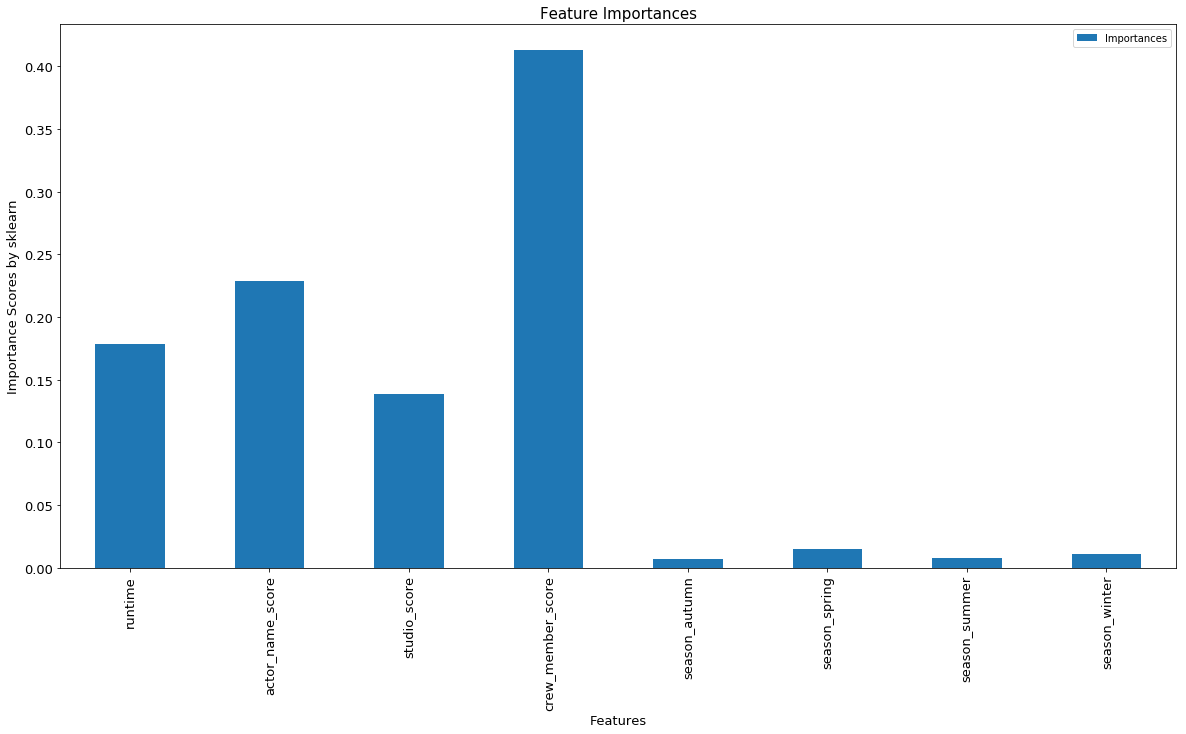

In [51]:
eval_df = pd.DataFrame({'Feature':cols, 'Importances':rf.feature_importances_})
ax = eval_df.plot(kind='bar', figsize=(20,10), fontsize=13)
plt.title('Feature Importances', fontsize=15)
ax.set_xlabel('Features', fontsize=13)
ax.set_ylabel('Importance Scores by sklearn', fontsize=13)
plt.xticks(list(range(0,8)),cols)
plt.show()